In [1]:
install.packages("rlang")
install.packages("tidymodels")
install.packages("readr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘vroom’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(tidymodels)
library(tidyverse)
library(readr)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──
✔ broom        1.0.1      ✔ recipes      1.0.1 
✔ dials        1.0.0      ✔ rsample      1.1.0 
✔ dplyr        1.0.10     ✔ tibble       3.1.8 
✔ ggplot2      3.3.6      ✔ tidyr        1.2.1 
✔ infer        1.0.3      ✔ tune         1.0.0 
✔ modeldata    1.0.1      ✔ workflows    1.1.0 
✔ parsnip      1.0.1      ✔ workflowsets 1.0.0 
✔ purrr        0.3.4      ✔ yardstick    1.1.0 
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   2.1.2     ✔ forcats 0.5.0
✔ stringr 1.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──

In [3]:
url<-"https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"
download.file(url, destfile="noaa-weather-sample-data.tar.gz")
untar<-("noaa-weather-sample-data.tar.gz")
weather<-read_csv("noaa-weather-sample-data/jfk_weather_sample.csv", col_types=cols('HOURLYPrecip'=col_number(),
                                                                                   'HOURLYWindSpeed'=col_number()))

Warning message:
“One or more parsing issues, see `problems()` for details”

In [4]:
head(weather)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,NA,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0,6,29.94,29.92


In [5]:
glimpse(weather)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, NA, 0.00, 0.00, 0.00, 0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [9]:
new_weather<-weather%>%select(c(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, HOURLYPrecip, HOURLYWindSpeed, HOURLYStationPressure))

In [10]:
new_weather

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,NA,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


In [13]:
head(new_weather,10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,NA,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


In [14]:
unique(new_weather$HOURLYPrecip)

[1] 0.00   NA 0.06 0.03 0.02 0.08 0.01 0.07 0.16 0.09 0.22 0.24 0.18 0.05 0.04
[16] 0.11 0.14 0.25 0.10 0.58 0.12 0.13 0.46 1.07 1.19 0.34 0.20 0.36 0.42 0.17
[31] 0.27 0.35 0.31 0.33 0.23 0.26 0.28 0.75 0.19 0.54 0.59 0.21

In [20]:
new_weather1<-new_weather%>%replace_na(list(HOURLYPrecip=0.0))

In [21]:
new_weather1

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,0.00,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


In [28]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [30]:
library(dplyr)

In [49]:
new_weather2<-new_weather1%>%rename("relative_humidity"="HOURLYRelativeHumidity",
                     "dry_bulb_temp_f"="HOURLYDRYBULBTEMPF",
                     "precip"="HOURLYPrecip",
                     "wind_speed"="HOURLYWindSpeed",
                     "station_pressure"="HOURLYStationPressure")
new_weather2

relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,0.00,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


In [50]:
set.seed(1234)
weather_split<-initial_split(new_weather2, prop=0.8)
train_data<-training(weather_split)
test_data<-testing(weather_split)

In [51]:
train_data

relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,21,0.00,36,30.09
27,44,0.00,8,29.87
63,47,0.00,21,30.03
79,71,0.00,6,29.67
48,78,0.00,8,29.94
75,62,0.00,5,30.38
52,33,0.00,10,30.75
27,82,0.00,13,29.89
43,42,0.00,15,29.90


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 130 rows containing non-finite values (stat_bin).”

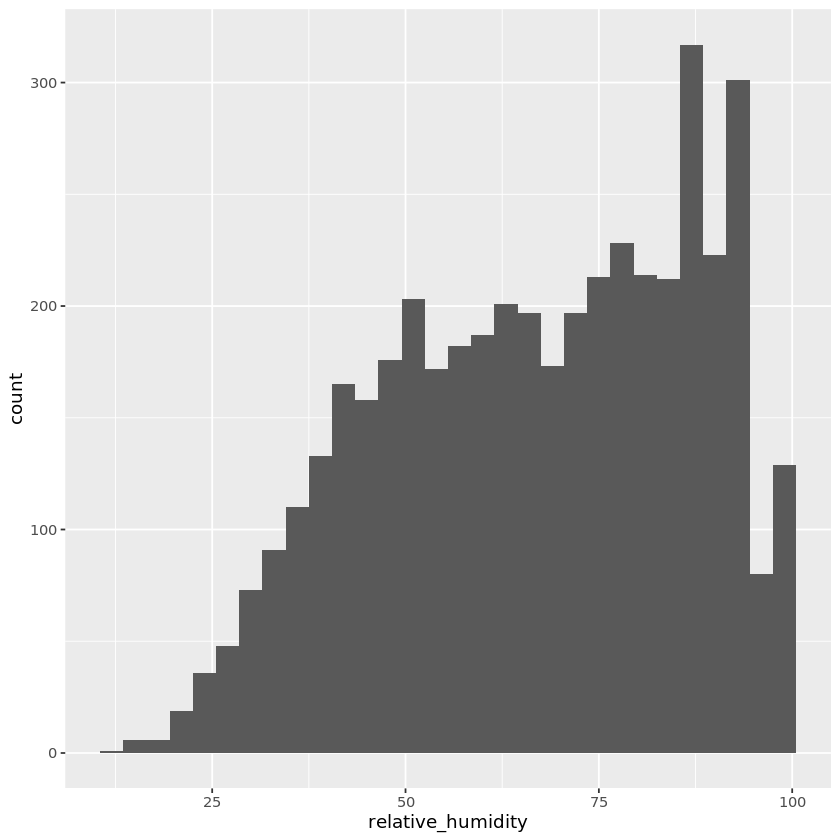

In [60]:
ggplot(train_data, aes(x=relative_humidity)) +
       geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 130 rows containing non-finite values (stat_bin).”

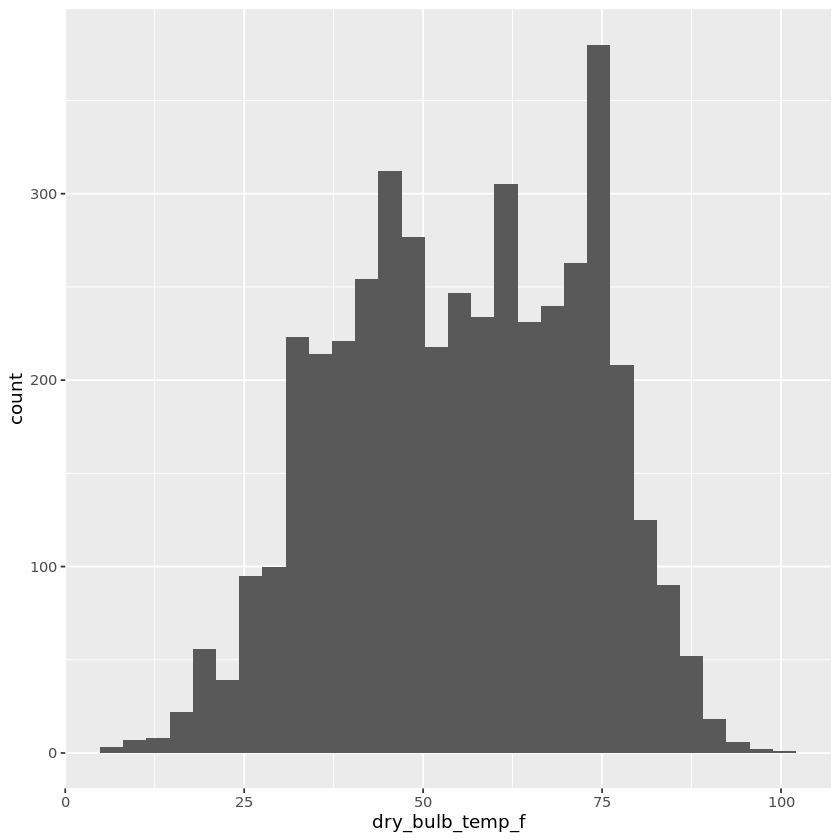

In [61]:
ggplot(train_data, aes(x=dry_bulb_temp_f)) +
       geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


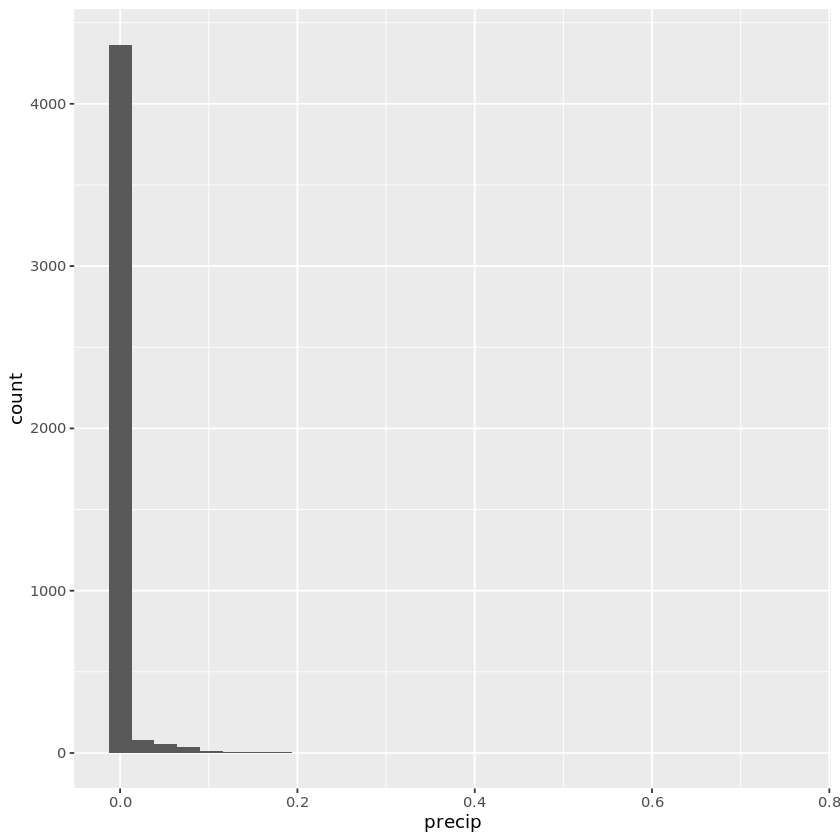

In [62]:
ggplot(train_data, aes(x=precip)) +
       geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 135 rows containing non-finite values (stat_bin).”

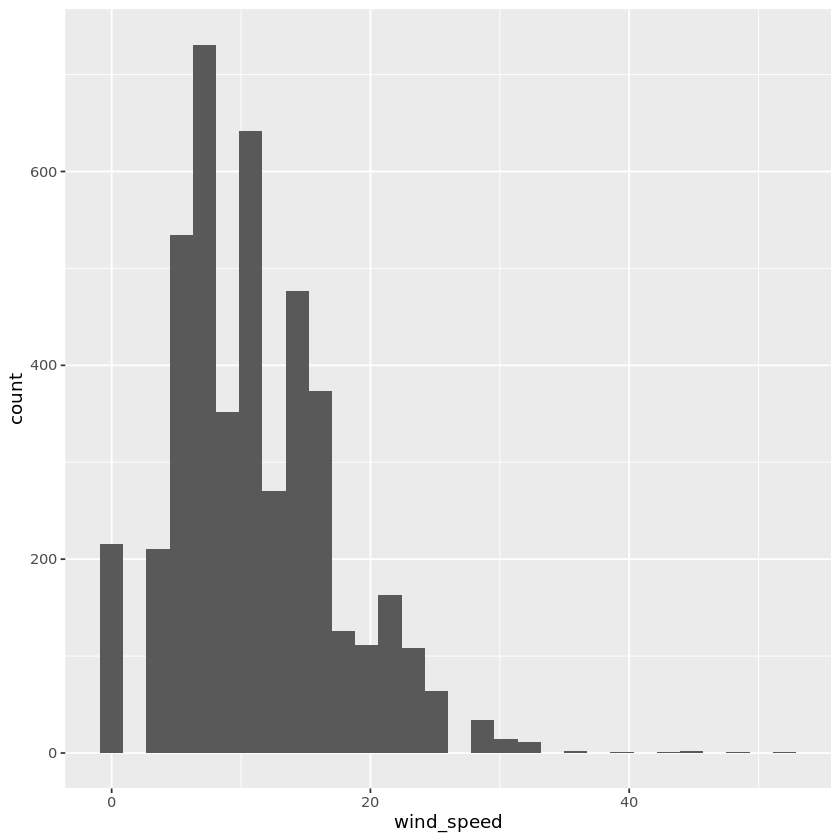

In [64]:
ggplot(train_data, aes(x=wind_speed)) +
       geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 135 rows containing non-finite values (stat_bin).”

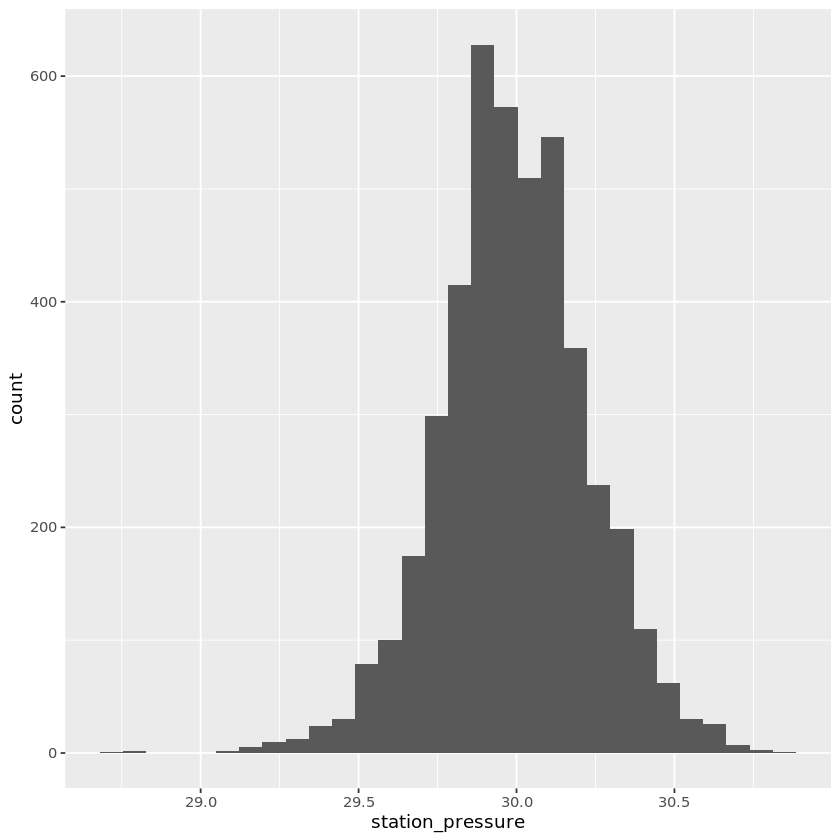

In [65]:
ggplot(train_data, aes(x=station_pressure)) +
       geom_histogram()

In [66]:
linear_model<-lm(precip ~ relative_humidity, data=new_weather2)
linear_model1<-lm(precip ~ dry_bulb_temp_f, data=new_weather2)
linear_model2<-lm(precip ~ wind_speed, data=new_weather2)
linear_model3<-lm(precip ~ station_pressure, data=new_weather2)

summary(linear_model)
summary(linear_model1)
summary(linear_model2)
summary(linear_model3)


Call:
lm(formula = precip ~ relative_humidity, data = new_weather2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01415 -0.00877 -0.00396  0.00086  1.17698 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.417e-02  1.647e-03  -8.603   <2e-16 ***
relative_humidity  2.832e-04  2.358e-05  12.009   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03527 on 5574 degrees of freedom
  (151 observations deleted due to missingness)
Multiple R-squared:  0.02522,	Adjusted R-squared:  0.02504 
F-statistic: 144.2 on 1 and 5574 DF,  p-value: < 2.2e-16



Call:
lm(formula = precip ~ dry_bulb_temp_f, data = new_weather2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00555 -0.00503 -0.00475 -0.00448  1.18500 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     3.780e-03  1.628e-03   2.322   0.0202 *
dry_bulb_temp_f 1.791e-05  2.798e-05   0.640   0.5220  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03572 on 5574 degrees of freedom
  (151 observations deleted due to missingness)
Multiple R-squared:  7.353e-05,	Adjusted R-squared:  -0.0001059 
F-statistic: 0.4099 on 1 and 5574 DF,  p-value: 0.522



Call:
lm(formula = precip ~ wind_speed, data = new_weather2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02047 -0.00586 -0.00394 -0.00279  1.18107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.791e-04  9.782e-04   0.490    0.624    
wind_speed  3.843e-04  7.628e-05   5.039 4.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03566 on 5569 degrees of freedom
  (156 observations deleted due to missingness)
Multiple R-squared:  0.004538,	Adjusted R-squared:  0.00436 
F-statistic: 25.39 on 1 and 5569 DF,  p-value: 4.831e-07



Call:
lm(formula = precip ~ station_pressure, data = new_weather2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02655 -0.00680 -0.00429 -0.00145  1.18018 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.506644   0.059819    8.47   <2e-16 ***
station_pressure -0.016734   0.001994   -8.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03552 on 5567 degrees of freedom
  (158 observations deleted due to missingness)
Multiple R-squared:  0.01249,	Adjusted R-squared:  0.01231 
F-statistic: 70.39 on 1 and 5567 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 151 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 151 rows containing missing values (geom_point).”

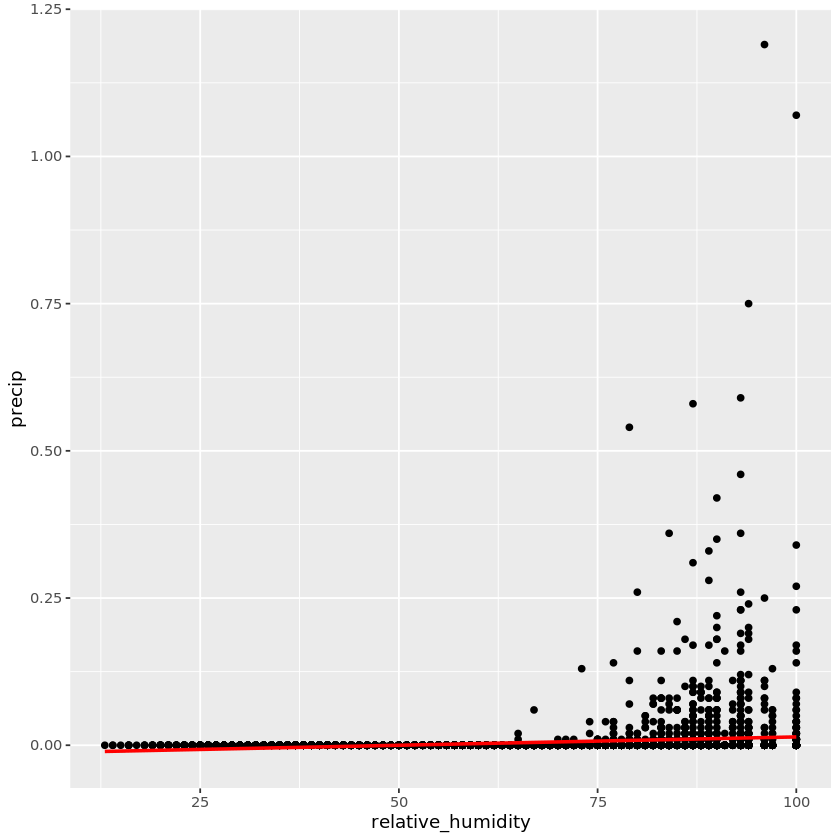

In [77]:
ggplot(new_weather2, aes(x=relative_humidity, y=precip)) +
geom_point() +
stat_smooth(method="lm", color="red")

Warning message:
“Removed 151 rows containing missing values (geom_point).”

geom_smooth: se = FALSE, na.rm = FALSE, orientation = NA
stat_smooth: method = lm, formula = NULL, se = FALSE, n = 80, fullrange = FALSE, level = 0.95, na.rm = FALSE, orientation = NA, method.args = list(), span = 0.75
position_identity 

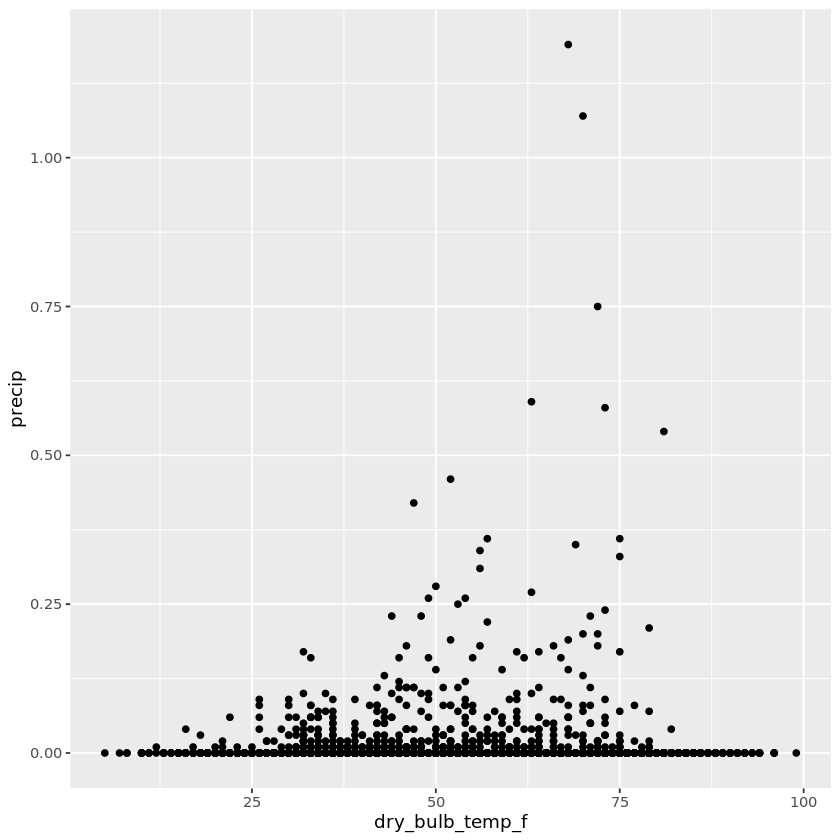

In [76]:
ggplot(new_weather2, aes(x=dry_bulb_temp_f, y=precip)) + 
geom_point()
stat_smooth(method="lm", se=FALSE, color="red")

Warning message:
“Removed 156 rows containing missing values (geom_point).”

geom_smooth: se = TRUE, na.rm = FALSE, orientation = NA
stat_smooth: method = lm, formula = NULL, se = TRUE, n = 80, fullrange = FALSE, level = 0.95, na.rm = FALSE, orientation = NA, method.args = list(), span = 0.75
position_identity 

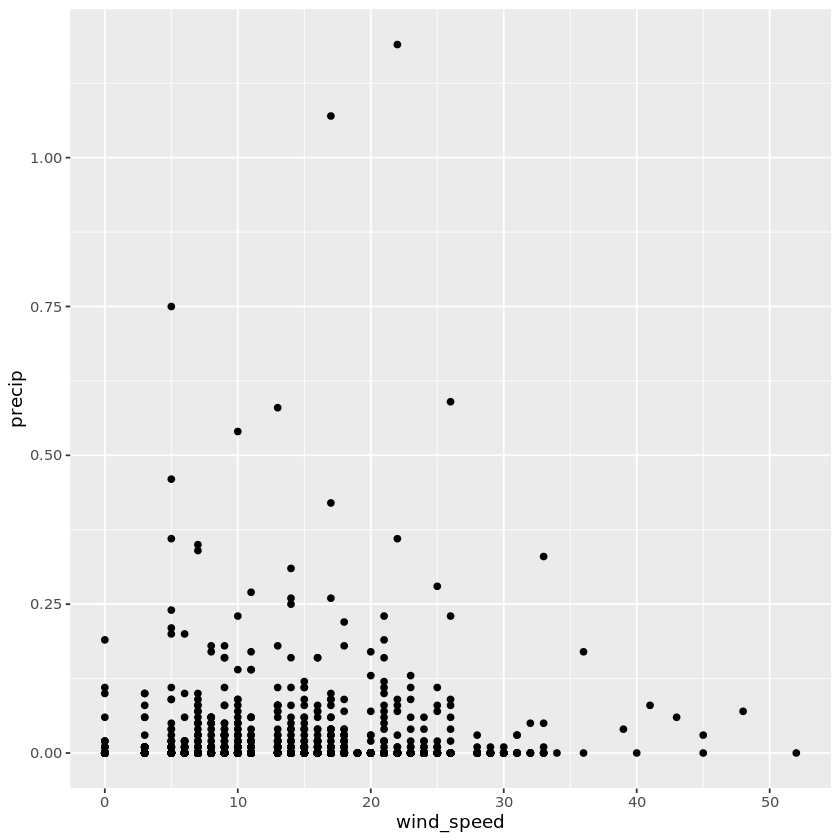

In [75]:
ggplot(new_weather2, aes(x=wind_speed, y=precip)) + 
geom_point()
stat_smooth(method="lm", color="red")

Warning message:
“Removed 158 rows containing missing values (geom_point).”

geom_smooth: se = FALSE, na.rm = FALSE, orientation = NA
stat_smooth: method = lm, formula = NULL, se = FALSE, n = 80, fullrange = FALSE, level = 0.95, na.rm = FALSE, orientation = NA, method.args = list(), span = 0.75
position_identity 

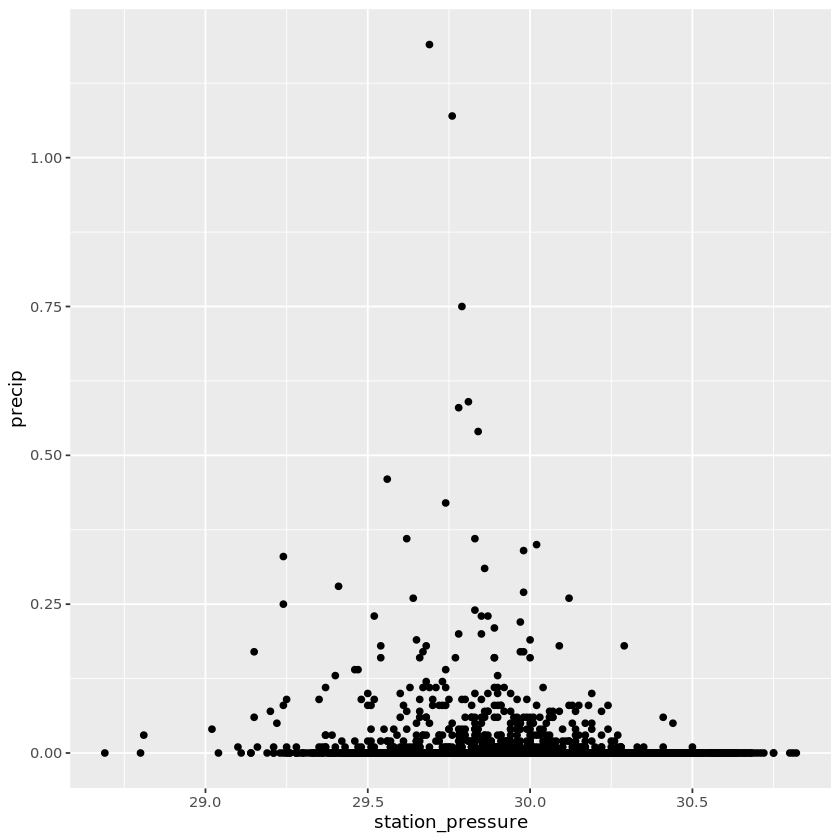

In [74]:
ggplot(new_weather2, aes(x=station_pressure, y=precip)) + 
geom_point()
stat_smooth(method="lm", se=FALSE, color="red")

In [83]:
mlr<-lm(precip ~ relative_humidity + wind_speed, data=train_data)
summary(mlr)


Call:
lm(formula = precip ~ relative_humidity + wind_speed, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02969 -0.00744 -0.00342  0.00095  0.74098 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.043e-02  1.932e-03 -10.577  < 2e-16 ***
relative_humidity  2.867e-04  2.257e-05  12.700  < 2e-16 ***
wind_speed         5.008e-04  7.197e-05   6.959 3.93e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02927 on 4442 degrees of freedom
  (136 observations deleted due to missingness)
Multiple R-squared:  0.03823,	Adjusted R-squared:  0.0378 
F-statistic: 88.28 on 2 and 4442 DF,  p-value: < 2.2e-16


In [84]:
polyfit2<-lm(precip ~ poly(wind_speed, 2, raw = TRUE), data=train_data)
summary(polyfit2)


Call:
lm(formula = precip ~ poly(wind_speed, 2, raw = TRUE), data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04541 -0.00424 -0.00349 -0.00320  0.74673 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)                       4.238e-03  1.317e-03   3.219  0.00130 **
poly(wind_speed, 2, raw = TRUE)1 -2.984e-04  1.988e-04  -1.501  0.13340   
poly(wind_speed, 2, raw = TRUE)2  2.096e-05  6.827e-06   3.071  0.00215 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02977 on 4443 degrees of freedom
  (135 observations deleted due to missingness)
Multiple R-squared:  0.005409,	Adjusted R-squared:  0.004961 
F-statistic: 12.08 on 2 and 4443 DF,  p-value: 5.851e-06


In [92]:
mse1<-mean(mlr$residuals^2)
mse1

[1] 0.0008563749

In [93]:
rmse1<-sqrt(mse)
rmse1

[1] 0.02926388

In [91]:
summary(mlr)$r.squared

[1] 0.03822865

In [94]:
mse<-mean(polyfit2$residuals^2)
mse

[1] 0.000885403

In [96]:
rmse<-sqrt(mse)
rmse

[1] 0.02975572

In [97]:
summary(polyfit2)$r.squared

[1] 0.005409058

In [102]:
comparison_df<-matrix(c('Metric','MSE','RMSE','RSQUARED','Multiple Regression',0.000,0.292,0.038,'Polynomial Regression',0.000,0.297,0.005), 
                      nrow=4, ncol=3)

In [103]:
comparison_df

Metric,Multiple Regression,Polynomial Regression
MSE,0,0
RMSE,0.292,0.297
RSQUARED,0.038,0.005


In [104]:
comparison_table<-as.table(comparison_df)
comparison_table

  A        B                   C                    
A Metric   Multiple Regression Polynomial Regression
B MSE      0                   0                    
C RMSE     0.292               0.297                
D RSQUARED 0.038               0.005                

In [ ]:
#As the MSE value is smaller for the multiple regression (mlr) model and R.squared value is higher for the same model, we can se t